┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = __init__() at init.jl:175
└ @ PyPlot C:\Users\Joheen\.julia\packages\PyPlot\mQXSC\src\init.jl:175
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = find_backend(::PyCall.PyObject) at init.jl:73
└ @ PyPlot C:\Users\Joheen\.julia\packages\PyPlot\mQXSC\src\init.jl:73
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = find_backend(::PyCall.PyObject) at init.jl:129
└ @ PyPlot C:\Users\Joheen\.julia\packages\PyPlot\mQXSC\src\init.jl:129
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot ov

(9088, 4)
(9185, 4)


┌ Warning: `haskey(o::PyObject, s::Union{Symbol, AbstractString})` is deprecated, use `hasproperty(o, s)` instead.
│   caller = #plot#85(::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}, ::Function, ::Array{Float32,1}, ::Vararg{Array{Float32,1},N} where N) at PyPlot.jl:176
└ @ PyPlot C:\Users\Joheen\.julia\packages\PyPlot\mQXSC\src\PyPlot.jl:176
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = #plot#85(::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}, ::Function, ::Array{Float32,1}, ::Vararg{Array{Float32,1},N} where N) at PyPlot.jl:179
└ @ PyPlot C:\Users\Joheen\.julia\packages\PyPlot\mQXSC\src\PyPlot.jl:179
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   cal

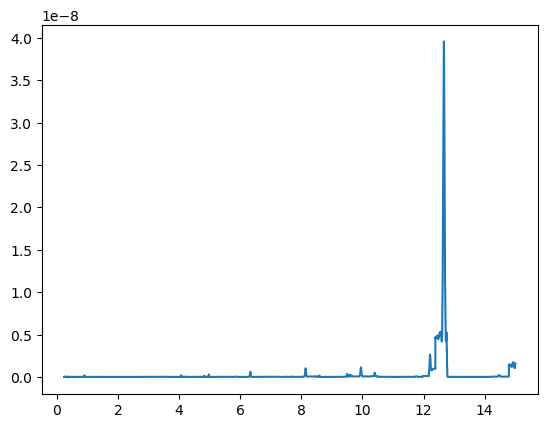

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base64.Base64EncodePipe}, ::MIME{Symbol("image/png")}, ::Figure) at PyPlot.jl:73
└ @ PyPlot C:\Users\Joheen\.julia\packages\PyPlot\mQXSC\src\PyPlot.jl:73
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base64.Base64EncodePipe}, ::MIME{Symbol("image/png")}, ::Figure) at PyPlot.jl:73
└ @ PyPlot C:\Users\Joheen\.julia\packages\PyPlot\mQXSC\src\PyPlot.jl:73
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base64.Base64EncodePipe}, ::MIME{Symbol("image/png

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002C68B588>

In [1]:
#Taking a closer look at TIC 25078924
#First, for kw = 1

include("../sebastien.jl")
using Main.WeirdDetector
using PyPlot
using DataFrames
using CSV
df = loadFITS(0, fitsdir="./Sample fits files/", tic_id="25078924")
d = pointsify(df)
periods = optimal_periods(0.25,15)
output=periodogram(d, periods, parallel=true, datakw=true)
output[:delt_chi2] = flatten(periods, output[:chi2], tess=true)
null_output = scrambled_periodogram(df, periods, tess=true)
null_output[:delt_chi2] = flatten(periods, null_output[:chi2], tess=true)
sigma = movingstd((null_output[
    :kurtosis] .- 3) .* (null_output[:delt_chi2]))
    output[:zeta] = (output[:kurtosis] .- 3) .* output[:delt_chi2] ./ sigma

plot(periods, output[:zeta])

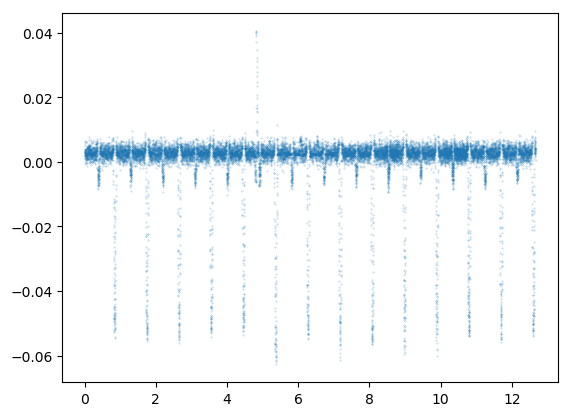

┌ Warning: `haskey(o::PyObject, s::Union{Symbol, AbstractString})` is deprecated, use `hasproperty(o, s)` instead.
│   caller = #scatter#99(::Base.Iterators.Pairs{Symbol,Float64,Tuple{Symbol,Symbol},NamedTuple{(:alpha, :s),Tuple{Float64,Float64}}}, ::Function, ::Array{Float64,1}, ::Vararg{Any,N} where N) at PyPlot.jl:176
└ @ PyPlot C:\Users\Joheen\.julia\packages\PyPlot\mQXSC\src\PyPlot.jl:176
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = #scatter#99(::Base.Iterators.Pairs{Symbol,Float64,Tuple{Symbol,Symbol},NamedTuple{(:alpha, :s),Tuple{Float64,Float64}}}, ::Function, ::Array{Float64,1}, ::Vararg{Any,N} where N) at PyPlot.jl:179
└ @ PyPlot C:\Users\Joheen\.julia\packages\PyPlot\mQXSC\src\PyPlot.jl:179


PyObject <matplotlib.collections.PathCollection object at 0x000000002C867C18>

In [2]:
period = periods[findall(a->a==maximum(output[:zeta]), output[:zeta])][1]
df[:t] = df[:t] .% period
scatter(df[:t], df[:F], alpha=0.4, s=0.1)


(9188, 4)
(9285, 4)


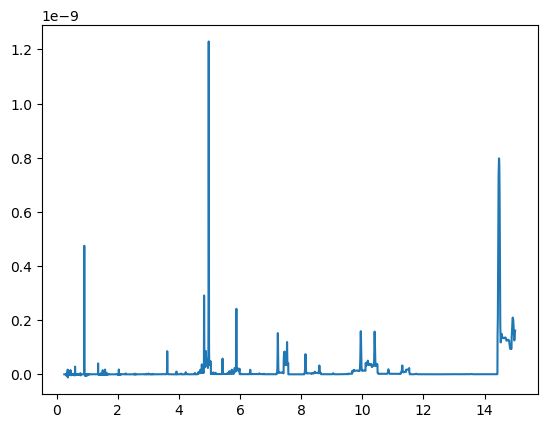

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002C78E898>

In [5]:
df = loadFITS(0, fitsdir="./Sample fits files/", tic_id="25078924", detrend_kw=1)
d = pointsify(df)
periods = optimal_periods(0.25,15)
output=periodogram(d, periods, parallel=true, datakw=true)
output.delt_chi2 = flatten(periods, output.chi2, tess=true)
null_output = scrambled_periodogram(df, periods, tess=true)
null_output.delt_chi2 = flatten(periods, null_output.chi2, tess=true)
sigma = movingstd((null_output.kurtosis .- 3) .* (null_output.delt_chi2))
    output.zeta = (output.kurtosis .- 3) .* output.delt_chi2 ./ sigma

plot(periods, output.zeta)

In [ ]:
period = periods[findall(a->a==maximum(output[:zeta]), output[:zeta])][1]
df[:modt] = df[:t] % period
scatter(df[:modt], df[:F], alpha=0.4, s=0.1)


In [ ]:
period = periods[findall(a->a==maximum(output[:zeta]), output[:zeta])][1] / 13
df[:modt] = df[:t] .% period
scatter(df[:t], df[:F], alpha=0.4, s=0.1)